## SyriaTel Churn Modeling: Predicting Customer Retention.

<img src="sl-blog-2021-04-churnandretention-2.jpg" width="1200" height="100" />

## 1. Business Understanding

### 1.1 Business Overview
* SyriaTel is a mobile communication service company headquartered in Damascus, Syria. It is the best performing mobile operator and operates the 2G and 3G network in the country. It has over two hundred international partners spread across 121 countries ( Tracxn, 2024). The company’s mobile services include data, news, voice, roaming and messaging.

* Like many other telecommunication firms, SyriaTel deals with the challenge of client attrition. It is important to identify potentially dissatisfied customers before they switch to other service providers. This would enable the company to raise its bottom line and retain more customers.

* The evaluation of customer’s loss rate is referred to as churn analysis. It allows for the company to know the rate at which its customers opt out from its services. Recruiting new customers is frequently more expensive than keeping existing ones. Due to the potential impact on profitability, churn analysis becomes vital for telecom firms such as SyriaTel. In particular, SyriaTel has seen swings in customer retention rates, raising questions about how to effectively hold onto valuable clients. By spotting churn early on, the business can take proactive steps to keep these clients, increasing long-term profitability. 

* The organization can concentrate on analyzing customer data and try deriving insights that lead to customer churning. SyriaTel may use machine learning algorithms to make data-driven decisions and create successful retention strategies by gaining insights about customer behavior and churn-influencing factors.

* We suggest using machine learning (ML) methods, particularly logistic regression for classification, to create a predictive churn model to resolve this issue. Through an examination of past data, the model will forecast the likelihood of a customer leaving based on a number of characteristics, including demographic data, service interactions, and consumer usage patterns.

### 1.2 Problem Statement
* The company do not have a reliable means to identify, in advance, the customers that are most likely to churn. Without such a strategy, the business is unable to effectively target customers with its retention initiatives. This raises turnover rates and the expenses related to customer attrition.
#####  1.2.1 The business problem
* SyriaTel requires a predictive model that can estimate customer attrition using the data at hand: 'state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls' and 'churn'. 
       
### 1.3  Objectives

#####  1.3.1 Primary Objective
* To develop a classification model that accurately predicts customer churn based on the provided data, enabling the company to proactively implement effective customer retention strategies.

##### 1.3.2 Secondary Objectives
* To identify the factors that most responsible for customer churn.
* To identify customer patterns in relation to churning.

### 1.4 Metrics of Success

We anticipate to develop classification model whose performance metrics are as outline:
* Model accuracy > 80%
This is a general measure and is evaluated alongside the below metrics. Higher accuracy implies good overall performance.
* Precision > 70%
* Recall > 60%
* F1-score > 60%
* ROC-AUC > 70%

### 2.  Data Understanding
* Now that we have loaded the data, we proceed with understanding the shape, the basic statistics and the types of variable.

* We write function that we can load the data and get back the shape, info and description with df.shape, df.describe(), df.info() and df.isnull().sum()



In [21]:
import pandas as pd
import My_functions as mf

In [22]:
# Importing the data, 
# to be read using pandas, functions are defined under the hood.
df = mf.dataframe('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
mf.data_info(df)

The dataframe has 3333 rows
The dataframe has 21 columns
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  t

* The dataset is made up of 3333 rows and 21 columns. It comprises of comprised of both int, float, bool and object data types. There are no null values. we can proceed to show the columns that hold object data types and those with numerical values as categorical and numerical features accordingly.

### 3. Data Preparation

* The phase preparation begins with checking for non null values, duplicates and doing surface level data cleaning. We will do more of data preparation by performing various transformations when we will require transforming the data into a suitable format for modelling.
* For now lets perform data cleaning

#### 3.1 Data Cleaning
* Lets check for duplicates and outliers in our data set, in the numerical features alone.
 
* The area code is shown as a numerical value. This should be changed into type object. The target feature, churn, is of type 'bool.' We need to change it to object data type.
* The 'phone number'his is an identifier, unique value for each row, so it doesn't hold any meaningful information for modelinng. 

In [24]:
df['area code'] = df['area code'].astype('object')
df['churn'] = df['churn'].astype('object')
df.drop('phone number', axis =1, inplace = True)
# Call the categorical function to verify that area code has been chnaged to object
categorical_df = mf.Type_categorical(df)
categorical_df

,state,area code,international plan,voice mail plan,churn
0,KS,415,no,yes,False
1,OH,415,no,yes,False
2,NJ,415,no,no,False
3,OH,408,yes,no,False
4,OK,415,yes,no,False
...,...,...,...,...,...
3328,AZ,415,no,yes,False
3329,WV,415,no,no,False
3330,RI,510,no,no,False
3331,CT,510,yes,no,False


In [25]:
numerical_df = mf.Type_numerical(df)
numerical_df

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [26]:
# Check for duplicates
mf.duplicates(df)

False    3333
dtype: int64

### 4.Exploratory Data Analysis

* Exploratory Data Analysis (EDA) forms the foundational step in data analysis. We concentrate on exploring and understanding the dataset to uncover patterns, relationships, and insights before applying modeling or statistical techniques.
* Through visualizations such as scatter plots, histograms, and box plots, EDA helps reveal trends and distributions in the data, while correlation analysis identifies relationships between variables. We assess the impact of outliers using statistical methods. By conducting EDA, we will be able to gather first insights  and make informed decisions on further analysis.
* We perform various analyses such as,univariate, bivariate, and multivariate analyisis.

#### 4.1 Univariate Analysis

* In univariate analysis, we inspect each feature column individually, check for the distribution of the data, outliers detection and identify patterns.
* We can analyze for the categorical features and numerical features individually.
##### 4.1.1 Distribution of categorical features
* we first write a function that takes in the data and plots the distribution. we call the function and pass in our data frame as the arguement
* We have three categorical feature; state, international plan and the voice mail plan

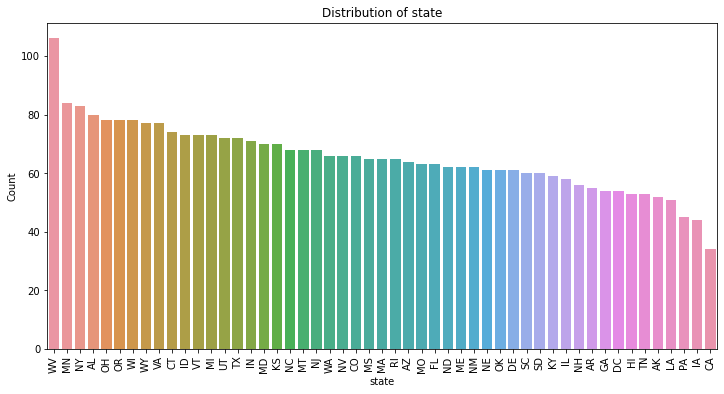

In [27]:
# Call the function to display the distribution of categorical features.
mf.category_distributions(categorical_df,'state') 

* We see that majority of the customers base is from West Virginia,Minnesota,NewYork,Alabama and Wisconsin.

no     3010
yes     323
Name: international plan, dtype: int64

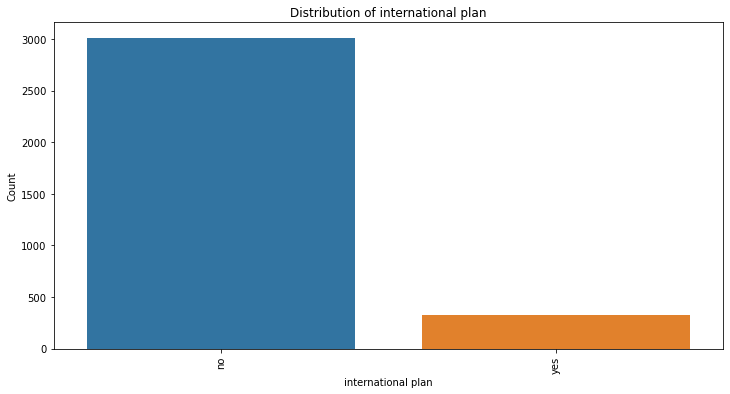

In [28]:
# Show the distribution of international plan feature
mf.category_distributions(categorical_df,'international plan')
# Evaluate the value counts of each sub-category
categorical_df['international plan'].value_counts()

* Of the SyriaTel customers, only 323 have an international plan

415    1655
510     840
408     838
Name: area code, dtype: int64

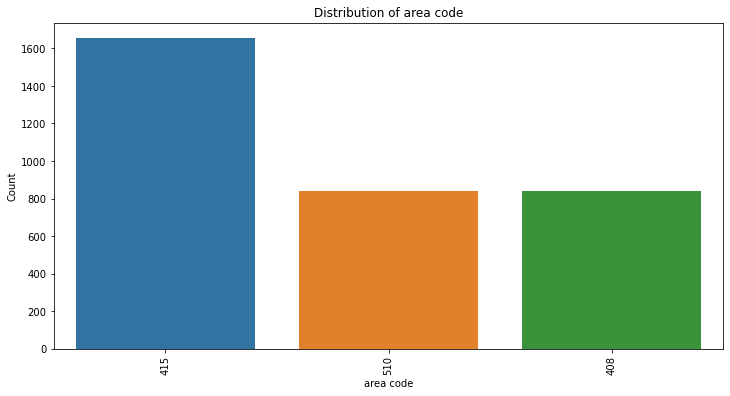

In [29]:
# Show the distribution of area code feature
mf.category_distributions(categorical_df,'area code')
# Evaluate the value counts of each sub-category
categorical_df['area code'].value_counts()

The distribution of customers across the area codes was almost even for area codes 510 and 408, while it was highest for the area 415. This indicates that area 415 has the most customers, this can be attributed to the possibility that this the area where the company is domiciled. The even distribution across the other two area codes could be influenced by other unknown factors.

no     2411
yes     922
Name: voice mail plan, dtype: int64

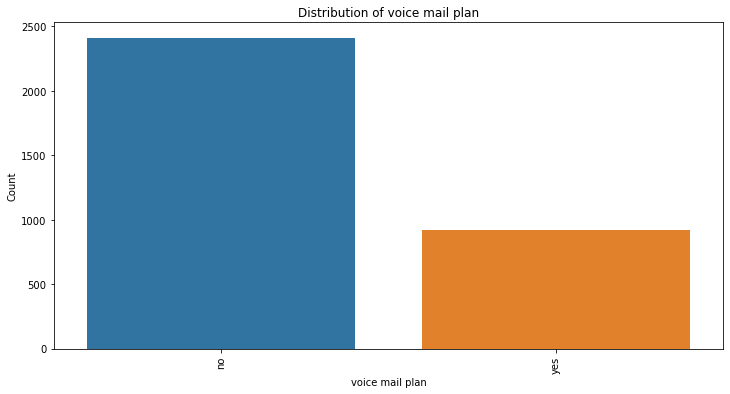

In [30]:
#
mf.category_distributions(categorical_df,'voice mail plan')
# find the value counts of each sub category
categorical_df['voice mail plan'].value_counts()

* Of the 3333 customers, only 922 are subscribed to the voice mail plan

False    0.855086
True     0.144914
Name: churn, dtype: float64

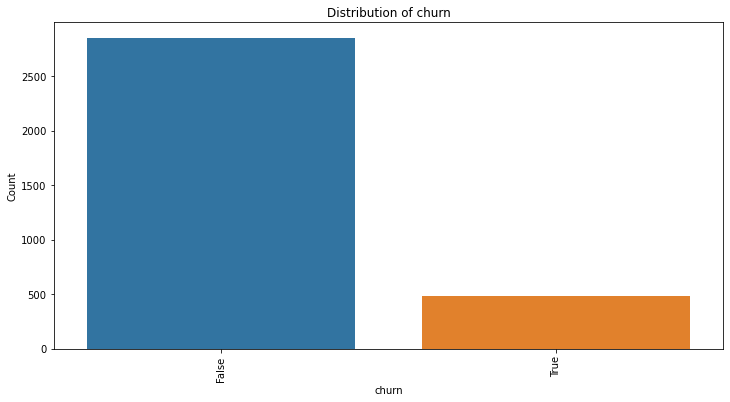

In [31]:
# Show the distribution of the target feature. the churn
mf.category_distributions(df, 'churn')
# show the vaue count of the churn customer.
df['churn'].value_counts(normalize = True)

* This is our target feature. out of 3333, around 14.5% have churned.
* This is a binary class and the distribution show imbalance that must be checked before we model.

##### 4.1.1 Distribution of numerical features

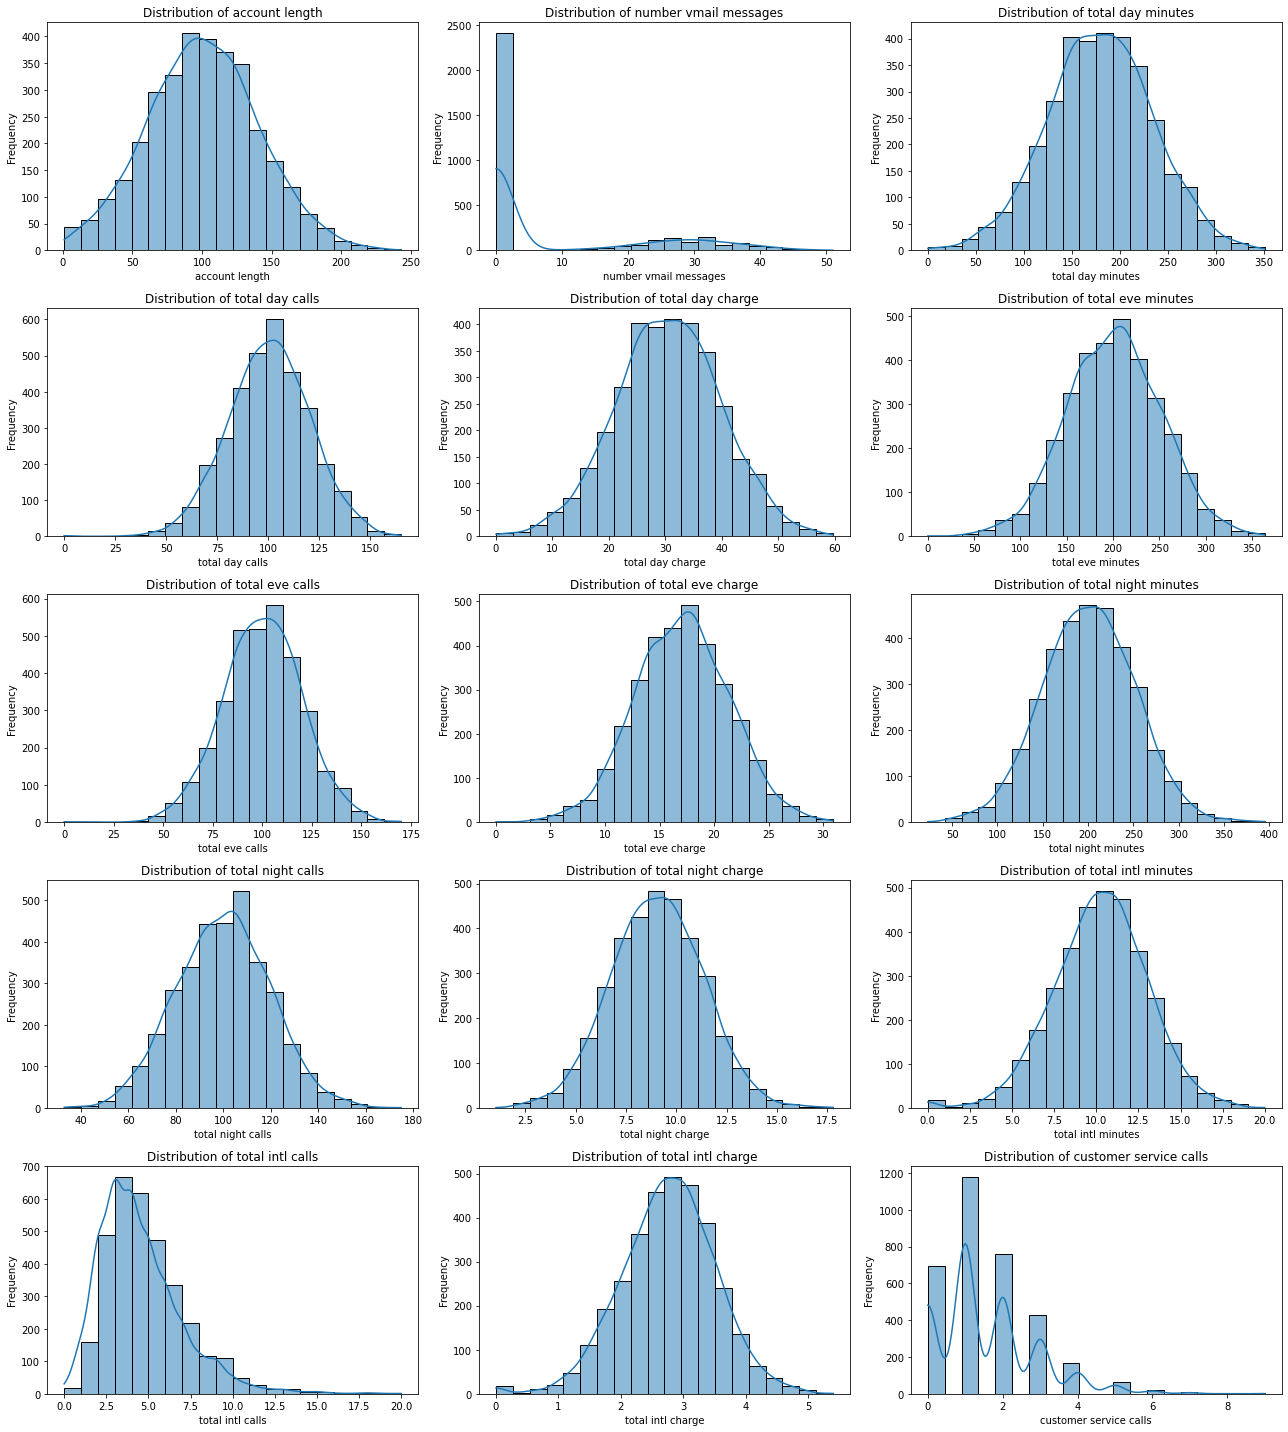

In [32]:
# Display various plots for all of the numerical features
mf.Feature_distributions(numerical_df)

* The distribution of the numerical features is mostly normally distributed as shown in the above plots.
* The distribution of the area codes shows that most of the customers are from the area code 415. The other area code are 510, and 408 with fairly equal number of customers.
* The total international calls seen be a bit skewed however still showing normal distribution.
* The customer service calls shows several peaks, showing a varying pattern of the population that could be possibly triggered by other factors.

#### 4.2 Bivariate Analysis
* In bivariate analysis, we analyse one to one relationships between variables.

* This will allow us to identify significant interactions or correlations, patterns, dependncies and trends between features in our data set. The goal is to identify changes in variable that are associated with the others. 
* We evaluate the bivariates by analyzing both categorical and numericals, individually against churn.

##### 4.2.1 categorical
We define a function that groups by the categorical feature we want to plot for, then retrieve the counts of churn in that group. we then plot for the churn counts of each categorical feature. 

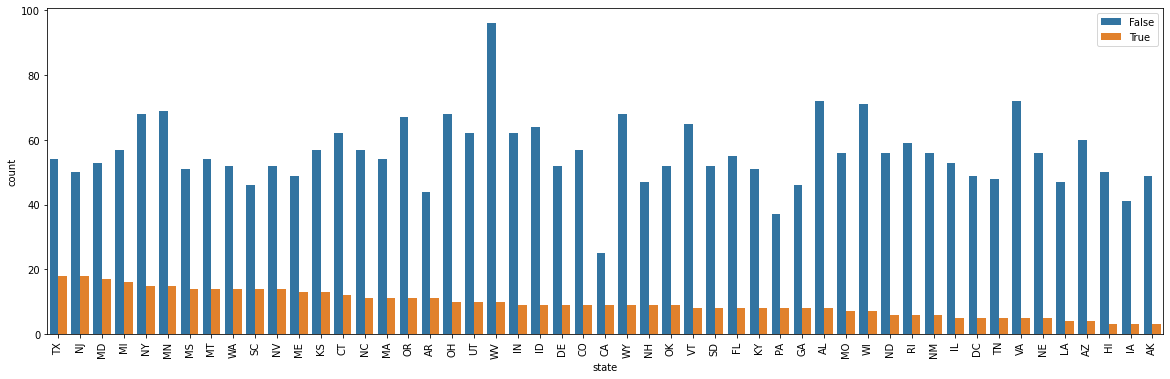

In [33]:
# Call the function and plot the churn distribution for every state.
mf.categorical_bivariates(df, 'state');

The majority of customers who churned were from texas, new jersey, minesota as shown by the plot above. 
churn rate were low at state AK, IA, HI and AZ

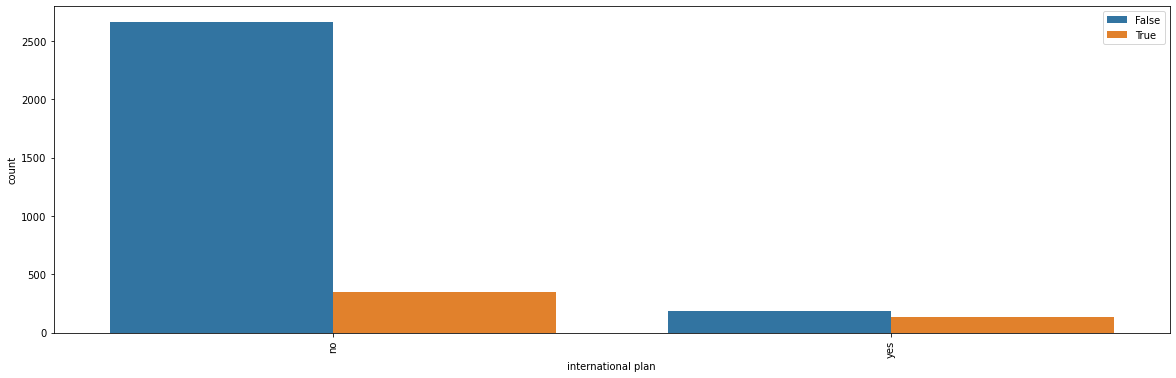

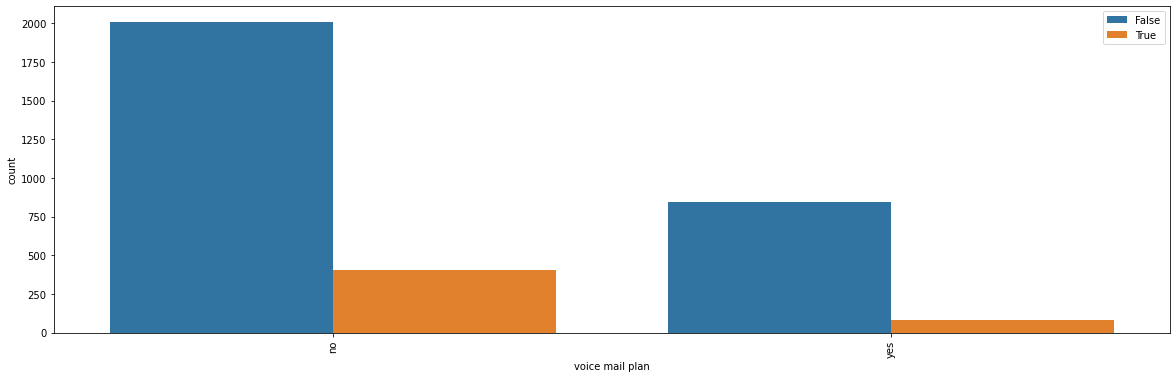

In [34]:
mf.categorical_bivariates(df, 'international plan');
mf.categorical_bivariates(df, 'voice mail plan');

* The above plot shows that majority of customers who churned did not have international plan and voice mail plan

##### 4.2.2 Numerical

* Next, we define a function that plots the kernel densities of the numerical features.
* we first merge the numerical_df with the churn column to allow for bivariate comparison. We then call the function that plots the kernel densities for all numerical features against the churn and interpret.

In [35]:
dta_2 = pd.concat([numerical_df, df['churn']], axis = 1)
dta_2

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


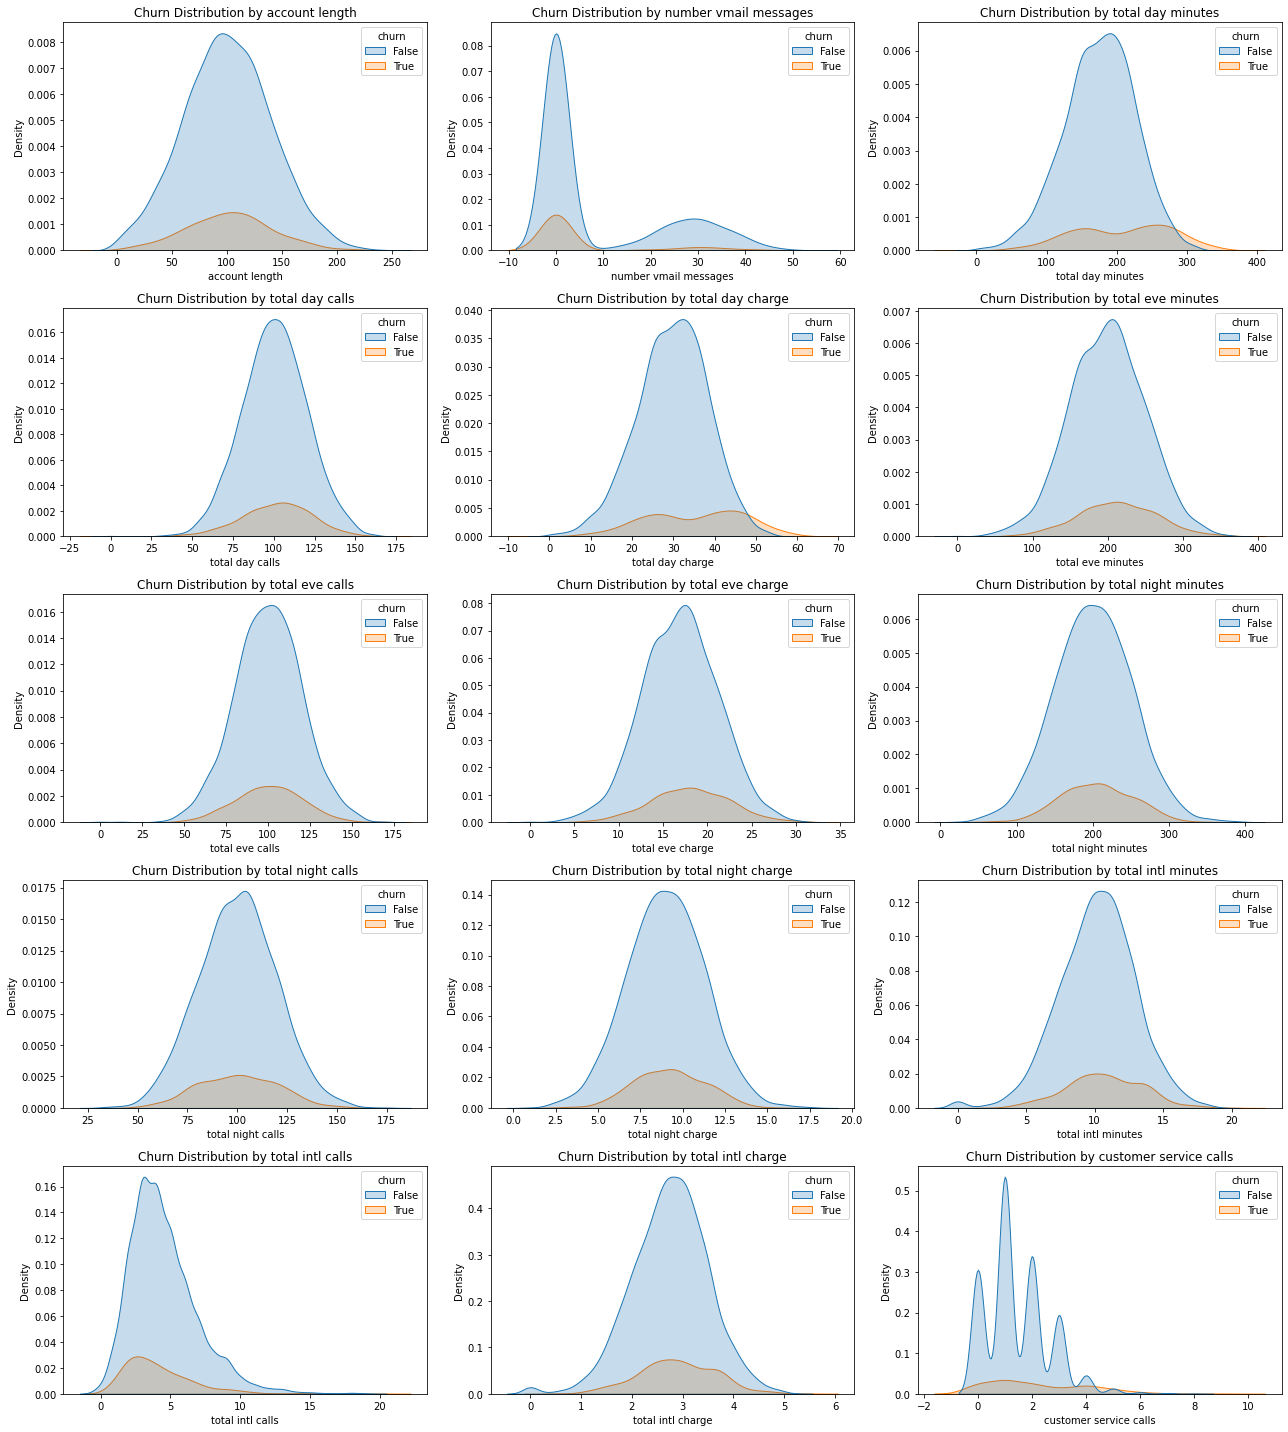

In [36]:
mf.plot_churn_kde(dta_2);

* The plots above shows that customers who churn have considerably higher charges; 
* Customers who churn have overally higher total initial charges, higher night charges, higher evening charges, total day charges. This imply that customers who find their charges expensive are more likely to close their accounts.
* Generally,the numbers of customers who charn when compared against the features is average of the number of customers who do no not churn. This implies the need for a proactive customer retention strategies. 

#### 4.3 Dealing with outliers

* Outliers in predictive models can cause overfitting, reduced accuracy, and instability during training. Excluding outliers, which are data points beyond 3 standard deviations from the mean, improves accuracy and stable training. 
* Eliminating outliers aligns with algorithms' assumptions and enhances model performance on unseen data, ensuring a normal distribution. For our case we  define the outliers as values lying beyong 1.5 times the interquartile range (IQR). We will exclude values beyong the lower and upper bounds defined by use of the inter-quartile range.

In [37]:
# check and count the number of outliers
mf.outliers(numerical_df)  

[('account length', 18),
 ('number vmail messages', 1),
 ('total day minutes', 25),
 ('total day calls', 23),
 ('total day charge', 25),
 ('total eve minutes', 24),
 ('total eve calls', 20),
 ('total eve charge', 24),
 ('total night minutes', 30),
 ('total night calls', 22),
 ('total night charge', 30),
 ('total intl minutes', 46),
 ('total intl calls', 78),
 ('total intl charge', 49),
 ('customer service calls', 267)]

In [38]:
#Check whether the outliers have been removed
df = mf.Remove_Outliers(df)
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### 4.4 Feature Correlations

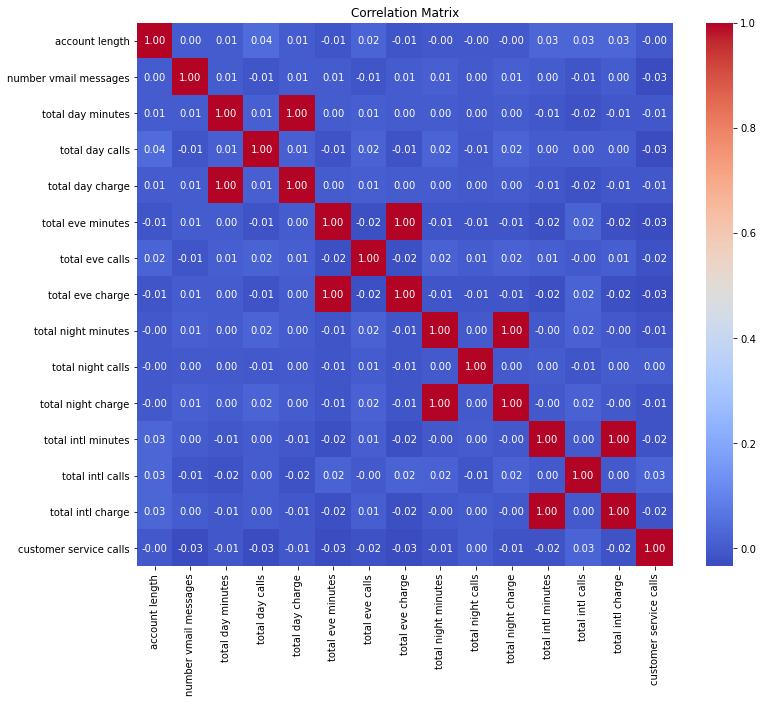

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
mf.corr_matrix(df)

From the heatmap, several features show perfect positive correlation. These features are;
* **Total day charge** and **total day minutes**
* **Total initial charge** and **total initial minutes**
* **Total night charge** and **total night minutes**
* **Total evening charge** and **total evening minutes.**

This is approves the rational that charges are directly influenced by total minutes spent.
* The influence of the perfect correlation impacts the model performance when it comes to its ability to generalize to the unseen data, a phenomenon referred to as overfitting or the dummy variable trap.
* To deal with this effect of overfitting, we will have to model on one side of the features that lead to perfect correlations, ie, only use one set of the feature, either the charges or the minutes features.
* We drop **total initial minutes**,**total day minutes**,**total night minutes**, **total evening minutes.**

In [40]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [41]:
df = df.drop(['total intl minutes','total day minutes','total night minutes','total eve minutes'], axis = 1)
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False
5,AL,118,510,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False
3329,WV,68,415,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False
3330,RI,28,510,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False
3331,CT,184,510,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False


### 4.5 Feature Engineering & Preprocessing

* Feature engineering is the process of turning unstructured data into useful features that more accurately depict the underlying issue. Since the nature and quality of the features have a direct impact on the model's capacity to learn and generalize from the data, it is an essential step in the development of machine learning models.

* By transforming unstructured data into a more informative and structured format, feature engineering seeks to increase model performance and accuracy by facilitating the model's ability to identify pertinent patterns.

* To optimally ensure no issues like data leakage, we first split the data into training and testing sets. If we perform feature engineering on the entire data set, we will allow the testing dataset to influence the training feature's parameters. We do it separately to ensure that the training set does not have the knowledge of test parameters/characteristics. This retains the autonomy of the testing data as truly unseen data.
* From this point we then perform the suitable feature engineering:
  * 1.Handle categorical feature
      * label encoding
      * Onehot encoding
  * 2 Scaling continous features

#### 4.5.1 Spliting the data

In [42]:
df['churn'] = df['churn'].astype('int')
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
5,AL,118,510,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,WV,68,415,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,RI,28,510,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,CT,184,510,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


In [43]:
numerical_cols = df.select_dtypes(include= 'number').columns
numerical_cols

Index(['account length', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [44]:
categorical_cols =df.select_dtypes(include = 'object').columns
categorical_cols

Index(['state', 'area code', 'international plan', 'voice mail plan'], dtype='object')

In [45]:
# Import the sklearn models
from sklearn.model_selection import train_test_split
# predictor/ independent features
X = df.drop('churn', axis=1)  
# dependent features
y = df['churn']  
# split the data with test size 0.25 and random state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1255,NH,90,415,no,no,0,121,12.94,73,24.68,89,10.66,3,2.92,0
1607,NM,21,415,no,yes,19,94,22.56,101,17.39,78,6.96,7,3.48,3
2497,MN,79,408,no,yes,32,62,8.60,87,17.12,121,6.61,4,1.13,2
1236,NE,91,510,no,no,0,109,27.03,142,21.68,73,3.71,4,2.73,0
767,WV,148,415,no,yes,26,150,41.63,138,10.03,91,10.62,4,4.10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,NM,94,415,no,no,0,79,18.36,152,20.56,92,11.34,3,2.81,3
1336,MS,124,415,no,no,0,85,42.76,98,18.21,71,8.37,6,3.00,3
1378,IL,58,415,yes,yes,43,96,24.28,100,23.15,105,8.70,4,2.40,1
1569,NC,73,415,no,yes,31,104,33.05,84,14.96,110,10.35,3,3.11,0


In [46]:
numerical_cols = X_train.select_dtypes(include= 'number').columns
numerical_cols

Index(['account length', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

#### 4.5.2 Dealing with Categorical Data

* Display the categorical column from the X_train dataFrame. 
* We Onehot encode the international and the voice mail plan columns since they have binary data(yes/no)
* we could also label encode the state column. By labeling the state, we will be able to identify the state by the value.

In [47]:
mf.Type_categorical(X_train)

,state,area code,international plan,voice mail plan
1255,NH,415,no,no
1607,NM,415,no,yes
2497,MN,408,no,yes
1236,NE,510,no,no
767,WV,415,no,yes
...,...,...,...,...
1962,NM,415,no,no
1336,MS,415,no,no
1378,IL,415,yes,yes
1569,NC,415,no,yes


In [48]:
mf.Type_categorical(X_test)

,state,area code,international plan,voice mail plan
2463,WY,415,no,yes
1477,RI,415,no,no
867,NV,510,no,no
3088,AK,415,no,yes
2522,TN,415,no,no
...,...,...,...,...
62,MN,510,no,yes
1920,NM,415,no,no
2399,SD,415,no,no
3202,WA,510,no,no


   ##### 4.5.2.1 label Encoding

* We label encode the international plan  and the voice mail plan


In [49]:
from sklearn.preprocessing import LabelEncoder
X_train = X_train.copy()

Encode = LabelEncoder()

X_train['international plan'] = Encode.fit_transform(X_train['international plan'])
X_train['voice mail plan'] = Encode.fit_transform(X_train['voice mail plan'])
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1255,NH,90,415,0,0,0,121,12.94,73,24.68,89,10.66,3,2.92,0
1607,NM,21,415,0,1,19,94,22.56,101,17.39,78,6.96,7,3.48,3
2497,MN,79,408,0,1,32,62,8.60,87,17.12,121,6.61,4,1.13,2
1236,NE,91,510,0,0,0,109,27.03,142,21.68,73,3.71,4,2.73,0
767,WV,148,415,0,1,26,150,41.63,138,10.03,91,10.62,4,4.10,2


In [50]:
X_test = X_test.copy()

Encode = LabelEncoder()

X_test['international plan'] = Encode.fit_transform(X_test['international plan'])
X_test['voice mail plan'] = Encode.fit_transform(X_test['voice mail plan'])
X_test

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
2463,WY,146,415,0,1,11,82,30.72,90,14.76,89,10.42,4,2.73,2
1477,RI,112,415,0,0,0,102,28.66,117,25.33,110,8.76,5,2.65,1
867,NV,86,510,0,0,0,72,24.02,95,13.12,91,9.48,5,2.21,1
3088,AK,100,415,0,1,29,127,36.31,82,14.95,100,9.32,3,2.40,1
2522,TN,106,415,0,0,0,142,20.26,139,19.41,61,8.91,9,2.27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,MN,74,510,0,1,33,91,32.93,96,20.92,92,6.21,3,3.94,2
1920,NM,67,415,0,0,0,102,36.64,95,16.21,106,9.65,6,2.32,1
2399,SD,121,415,0,0,0,70,30.50,93,12.16,113,5.23,5,3.02,1
3202,WA,143,510,0,0,0,120,27.27,104,24.30,85,8.21,4,1.86,3


##### 4.5.2.2  Onehot Encoding
We onehot encode the state and the area code

In [51]:
X_train = pd.get_dummies(X_train, columns = ['state', 'area code'], drop_first = True)
X_test = pd.get_dummies(X_test, columns = ['state', 'area code'], drop_first = True)

In [52]:
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
1255,90,0,0,0,121,12.94,73,24.68,89,10.66,...,0,0,0,0,0,0,0,0,1,0
1607,21,0,1,19,94,22.56,101,17.39,78,6.96,...,0,0,0,0,0,0,0,0,1,0
2497,79,0,1,32,62,8.60,87,17.12,121,6.61,...,0,0,0,0,0,0,0,0,0,0
1236,91,0,0,0,109,27.03,142,21.68,73,3.71,...,0,0,0,0,0,0,0,0,0,1
767,148,0,1,26,150,41.63,138,10.03,91,10.62,...,0,0,0,0,0,0,1,0,1,0


In [53]:
X_test.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
2463,146,0,1,11,82,30.72,90,14.76,89,10.42,...,0,0,0,0,0,0,0,1,1,0
1477,112,0,0,0,102,28.66,117,25.33,110,8.76,...,0,0,0,0,0,0,0,0,1,0
867,86,0,0,0,72,24.02,95,13.12,91,9.48,...,0,0,0,0,0,0,0,0,0,1
3088,100,0,1,29,127,36.31,82,14.95,100,9.32,...,0,0,0,0,0,0,0,0,1,0
2522,106,0,0,0,142,20.26,139,19.41,61,8.91,...,0,0,0,0,0,0,0,0,1,0


In [54]:
Numerical_cols = X_train.select_dtypes(include = 'number')
Numerical_cols

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
1255,90,0,0,0,121,12.94,73,24.68,89,10.66,...,0,0,0,0,0,0,0,0,1,0
1607,21,0,1,19,94,22.56,101,17.39,78,6.96,...,0,0,0,0,0,0,0,0,1,0
2497,79,0,1,32,62,8.60,87,17.12,121,6.61,...,0,0,0,0,0,0,0,0,0,0
1236,91,0,0,0,109,27.03,142,21.68,73,3.71,...,0,0,0,0,0,0,0,0,0,1
767,148,0,1,26,150,41.63,138,10.03,91,10.62,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,94,0,0,0,79,18.36,152,20.56,92,11.34,...,0,0,0,0,0,0,0,0,1,0
1336,124,0,0,0,85,42.76,98,18.21,71,8.37,...,0,0,0,0,0,0,0,0,1,0
1378,58,1,1,43,96,24.28,100,23.15,105,8.70,...,0,0,0,0,0,0,0,0,1,0
1569,73,0,1,31,104,33.05,84,14.96,110,10.35,...,0,0,0,0,0,0,0,0,1,0


* Above, we approve that the area codes and the states have been successfully onehotencoded.

#### 4.5.3 Dealing with Numerical Data

##### 4.5.3.1 Standardization 

* By standardizing the data, we transform it to have a mean of 0 and standard deviation of 1. The standardization process entails subtracting the mean of the data and dividing by the standard deviation.
* Standardization is majorly used when the data follows a normal or Gaussian distribution and the data in the features have different scales. The values in the data set features need not be constrained in a specified range, thus standardization is the best transformation to consider.

In [55]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
Scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_standard = Scaler.fit_transform(X_train[numerical_cols])

# Convert the scaled data back to a DataFrame with the original column names
X_train.loc[:, numerical_cols] = pd.DataFrame(X_train_standard, columns=numerical_cols, index=X_train.index)

# Use the same scaler (fitted on the training data) to transform the test set
X_test_standard = Scaler.transform(X_test[numerical_cols])

# Convert the scaled test data back to a DataFrame with the original column names
X_test.loc[:, numerical_cols] = pd.DataFrame(X_test_standard, columns=numerical_cols, index=X_test.index)

# Check the transformed data
print(X_train.shape)
print(X_test.shape)
X_test

(2097, 65)
(700, 65)


,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
2463,1.175958,0,1,0.231430,-0.977781,0.037821,-0.531557,-0.568117,-0.583165,0.633415,...,0,0,0,0,0,0,0,1,1,0
1477,0.303915,0,0,-0.583342,0.071503,-0.192871,0.878366,1.952475,0.510427,-0.126704,...,0,0,0,0,0,0,0,0,1,0
867,-0.362942,0,0,-0.583342,-1.502423,-0.712487,-0.270460,-0.959202,-0.479013,0.202986,...,0,0,0,0,0,0,0,0,0,1
3088,-0.003865,0,1,1.564693,1.383109,0.663824,-0.949311,-0.522808,-0.010331,0.129722,...,0,0,0,0,0,0,0,0,1,0
2522,0.150025,0,0,-0.583342,2.170072,-1.133556,2.027191,0.540753,-2.041287,-0.058019,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,-0.670722,0,1,1.860973,-0.505603,0.285310,-0.218240,0.900837,-0.426937,-1.294357,...,0,0,0,0,0,0,0,0,0,1
1920,-0.850260,0,0,-0.583342,0.071503,0.700779,-0.270460,-0.222340,0.302124,0.280830,...,0,0,0,0,0,0,0,0,1,0
2399,0.534750,0,0,-0.583342,-1.607351,0.013184,-0.374898,-1.188130,0.666655,-1.743102,...,0,0,0,0,0,0,0,0,1,0
3202,1.099013,0,0,-0.583342,1.015859,-0.348532,0.199514,1.706854,-0.791468,-0.378551,...,0,0,0,0,1,0,0,0,0,1


### 5. Modelling

* In this phase, we will build a model designed to predict customer churn using the features in our dataset. The model's performance will be assessed based on its recall score. To meet the project's goals, a recall score of 70% or above will be considered a successful outcome.

* To reach these objectives outlined in the project proposal, we will utilize the following algorithm:
* Logistic Regression

#### 5.1 The Baseline Model

In [56]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# initialize a logistic regression model
baseline_model = LogisticRegression()
# fitting the model
baseline_model.fit(X_train, y_train)
#predictions on the training set
y_train_pred = baseline_model.predict(X_train)

#baseline model evaluation on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9251311397234144
Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1883
           1       0.77      0.38      0.51       214

    accuracy                           0.93      2097
   macro avg       0.85      0.68      0.73      2097
weighted avg       0.92      0.93      0.91      2097



* The training accuracy imply that the model correctly predicts 93% of the samples in the training set. This is considerably high and imply that the model is performing well on traininga data. 
* The other metrics are also high; recall, precision, and f1 -score. 
* The model shows bias in categorizing/predicting the class in regard to the metrics; precision, recall, and f1-score. 
##### 5.1.1 performance of the baseline model of X_test

In [57]:
# Create a function that evaluates the testing data from the train_test_split
def Test_evaluation(data, model):
   
    #make predictions on the test dataset
    y_test_pred = model.predict(data)
    
    # evaluate the baseline model on the test data set
    Accuracy = accuracy_score(y_test,y_test_pred)
    
    print("-------------------------Test Accuracy-----------------------------------")
    print(Accuracy)
    
    print("-------------------------Testing Classification Report-----------------------------------")
    print(classification_report(y_test,y_test_pred))
    
    # Compute confusion matrix
    print("-------------------------Confusion_Matrix-----------------------------------")
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print(conf_matrix)
    

In [58]:
# Create a function that evaluate the model on the test data on ROC/AUC
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

def Area_underCurve(data, model):
    # create the probability scores of each of the datapoints:
    y_score = model.fit(X_train, y_train).decision_function(X_test)

    # Compute the ROC curve (FPR, TPR, thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Compute AUC
    roc_auc = auc(fpr, tpr)
    print("-------------------------Area_underCurve-----------------------------------")
    print(roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    # plot the diagonal line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

-------------------------Test Accuracy-----------------------------------
0.9014285714285715
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       610
           1       0.76      0.34      0.47        90

    accuracy                           0.90       700
   macro avg       0.83      0.66      0.71       700
weighted avg       0.89      0.90      0.88       700

-------------------------Confusion_Matrix-----------------------------------
[[600  10]
 [ 59  31]]
-------------------------Area_underCurve-----------------------------------
0.8171402550091075


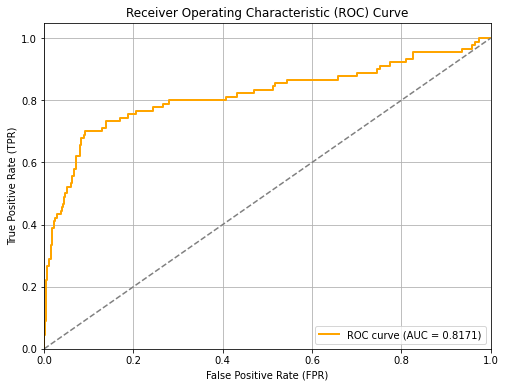

In [59]:
#Call the function to display the test performance and the ROC-AUC
Test_evaluation(X_test, baseline_model)
Area_underCurve(X_test,baseline_model)

* The test accuracy is approximately 90% which is lower than the training accuracy. This imply that the model does not generalize well to the unseen data. The model precisely predicts class 0, 91% of the time and class 1, 76% precision.
* Recall of 98% on the class 0 and 34% on class 1. The f1 score for class 0 is also considerably high with 95% for class 0 and 47%  for class 1. This is a poor performance. 
* Generarally, the model performs well on the testing data on class 0, the significant drop in the metrics, precision and recall for class 1 suggests that the model fails to generalise the minority class when presented with the testing data.
* The baseline model is thus prospected to be overfitting to the majority class in the training data. 
* we can also reduce SMOTE oversampling ie, resampling/ oversampling class 1 and undersample class 0. 

##### 5.2 Dealing with class Imbalance
* We deal with class imbalance in in the training data set and before model training to ensure that the model learns meaningful patterns from both majority and the minority classes. We can oversample the minority class or undersample the majority class, but nly on the training set.
* Use the SMOTE(Synthetic Minority Oversampling Technique) to only generate synthetic samples of the minority class, ensuring balance set.

In [60]:
# Dealing with class imbalance
y_train.value_counts()

0    1883
1     214
Name: churn, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
# initialize the smote class
smote = SMOTE(sampling_strategy='auto',random_state =42)
#oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
# check if the values have been balanced
y_train_smote.value_counts()

1    1883
0    1883
Name: churn, dtype: int64

######  Now let us use the balanced dataset to train the baseline model

In [62]:
# Initialize another baseline model
baseline_model1= LogisticRegression()
# fitting the model
baseline_model1.fit(X_train_smote, y_train_smote)
#predictions on the test set
y_train_pred = baseline_model1.predict(X_train_smote)

#baseline model evaluation on the training set
train_accuracy = accuracy_score(y_train_smote, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
Test_evaluation(X_test, baseline_model1)

Training Accuracy: 0.938396176314392
Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1883
           1       0.95      0.92      0.94      1883

    accuracy                           0.94      3766
   macro avg       0.94      0.94      0.94      3766
weighted avg       0.94      0.94      0.94      3766

-------------------------Test Accuracy-----------------------------------
0.88
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       610
           1       0.54      0.48      0.51        90

    accuracy                           0.88       700
   macro avg       0.73      0.71      0.72       700
weighted avg       0.87      0.88      0.88       700

-------------------------Confusion_Matrix-----------------------------------
[[573  37]
 [ 47  43]]


-------------------------Area_underCurve-----------------------------------
0.7950819672131149


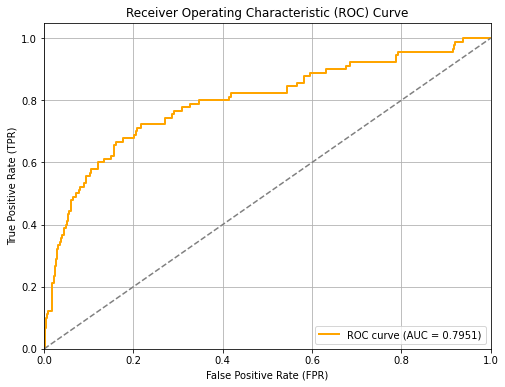

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
def AU_C(data, model):
    # create the probability scores of each of the datapoints:
    y_score = baseline_model1.fit(X_train_smote, y_train_smote).decision_function(data)

    # Compute the ROC curve (FPR, TPR, thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Compute AUC
    roc_auc = auc(fpr, tpr)
    print("-------------------------Area_underCurve-----------------------------------")
    print(roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    # plot the diagonal line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
AU_C(X_test, baseline_model1)

* Without class imbalance, we see that the model can equally predict the class zero and 1.
* Training accuracy on the balanced data set 93 percent, almost equal to that of the imbalanced data set, but here we see great improvement on precision, recall and f1-score metrics.
* We proceed to use this new baseline model and predict using the X_test data.

* After dealing with the class imbalance and predicting with the test data, we see an improvement on the recall and F1 score at the expense of precision of the minority class and the accuracy of the overall model. The accuracy on the test set is 88% which is significantly lower than the training accuracy, implying the model does not generalize well on unseen data, i.e overfitting.
* The precision drops from 76% to 54% but the recall and f1 score increases. 
* However, the AUC also drops from 81% to 79%. So we can proceed with the balanced baseline model and try to improve on the same.
* We can proceed to apply regularization, the l2 regularization for logistic regression.

### 5.3. Model Tuning
##### 5.3.1  Regularization
* This technique prevents overfitting by discouraging more complex modes. we prospect that our model is overfitting due to poor generalization to new data. Th etraining accuracy is higher that the test accuracy.
* to control regularization, we alter the size of the parameter C, a parameter that controls the strength of regularization. This value is inversely proportional to the regularization strength. This implies that;
     * larger values of C, results to less regularization, since the penalty term have smaller effect on the cost function
     * Smaller values of C leads to more regularization.
* The default value of C in logistic regression is typically 1.0. this value represents a balanced or moderate regularization. For our case, at the default regualrization, C= 1.0, we still prospect that the model is overfitting on the training data. 
* Thus we need to increase regularization strength by lowering the value of C. We try a second model with altered, lower values of C,and pick the most stable model.

In [64]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function that takes C and different solvers and data as parameters
def evaluate_logistic_regression(C_value, solver_type, X_train_smote, y_train_smote, X_test):
    # Initialize the logistic regression model with the provided C value and solver
    model = LogisticRegression(C=C_value, penalty='l2', solver=solver_type)
    
    # Fit the model to the training data
    model.fit(X_train_smote, y_train_smote)
    
    # Predictions on the training set
    y_train_pred = model.predict(X_train_smote)
    
    # Calculate and print training accuracy
    train_accuracy = accuracy_score(y_train_smote, y_train_pred)
    print(f"Training Accuracy (C={C_value}, Solver={solver_type}): {train_accuracy}")
    
    # Print classification report for the training set
    print("Training Classification Report:")
    print(classification_report(y_train_smote, y_train_pred))
    
    # Evaluate the model on the test set
    Test_evaluation(X_test, model)
    AU_C(X_test, model)
    return model

##### 5.3.1.1 Checking for different Hyperparameters(Values of C< 1)

Training Accuracy (C=0.8, Solver=liblinear): 0.9312267657992565
Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1883
           1       0.94      0.92      0.93      1883

    accuracy                           0.93      3766
   macro avg       0.93      0.93      0.93      3766
weighted avg       0.93      0.93      0.93      3766

-------------------------Test Accuracy-----------------------------------
0.8785714285714286
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       610
           1       0.53      0.48      0.50        90

    accuracy                           0.88       700
   macro avg       0.73      0.71      0.72       700
weighted avg       0.87      0.88      0.88       700

-------------------------Confusion_Matrix--------------------------

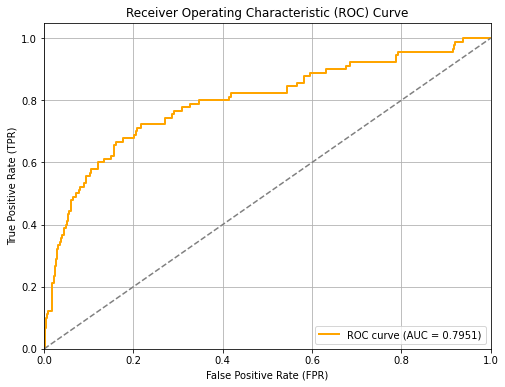

LogisticRegression(C=0.8, solver='liblinear')

In [65]:
evaluate_logistic_regression(0.8, 'liblinear', X_train_smote, y_train_smote, X_test)

Training Accuracy (C=0.5, Solver=liblinear): 0.9192777482740307
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1883
           1       0.93      0.90      0.92      1883

    accuracy                           0.92      3766
   macro avg       0.92      0.92      0.92      3766
weighted avg       0.92      0.92      0.92      3766

-------------------------Test Accuracy-----------------------------------
0.8714285714285714
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       610
           1       0.50      0.50      0.50        90

    accuracy                           0.87       700
   macro avg       0.71      0.71      0.71       700
weighted avg       0.87      0.87      0.87       700

-------------------------Confusion_Matrix--------------------------

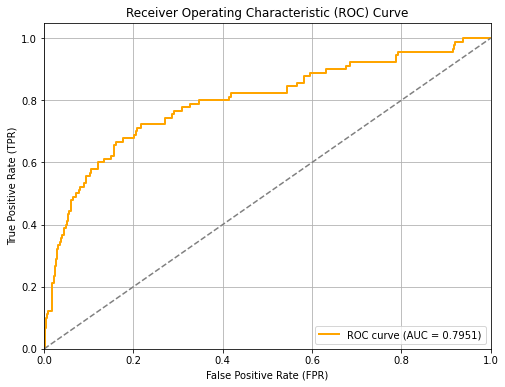

LogisticRegression(C=0.5, solver='liblinear')

In [66]:
evaluate_logistic_regression(0.5, 'liblinear', X_train_smote, y_train_smote, X_test)

Training Accuracy (C=0.1, Solver=liblinear): 0.8592671269251195
Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1883
           1       0.87      0.85      0.86      1883

    accuracy                           0.86      3766
   macro avg       0.86      0.86      0.86      3766
weighted avg       0.86      0.86      0.86      3766

-------------------------Test Accuracy-----------------------------------
0.8328571428571429
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       610
           1       0.40      0.62      0.49        90

    accuracy                           0.83       700
   macro avg       0.67      0.74      0.69       700
weighted avg       0.87      0.83      0.85       700

-------------------------Confusion_Matrix--------------------------

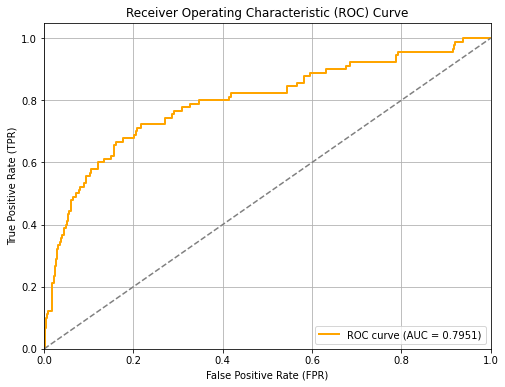

LogisticRegression(C=0.1, solver='liblinear')

In [67]:
evaluate_logistic_regression(0.1, 'liblinear', X_train_smote, y_train_smote, X_test)

Training Accuracy (C=0.08, Solver=liblinear): 0.8531598513011153
Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1883
           1       0.86      0.84      0.85      1883

    accuracy                           0.85      3766
   macro avg       0.85      0.85      0.85      3766
weighted avg       0.85      0.85      0.85      3766

-------------------------Test Accuracy-----------------------------------
0.8314285714285714
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       610
           1       0.40      0.66      0.50        90

    accuracy                           0.83       700
   macro avg       0.67      0.76      0.70       700
weighted avg       0.87      0.83      0.85       700

-------------------------Confusion_Matrix-------------------------

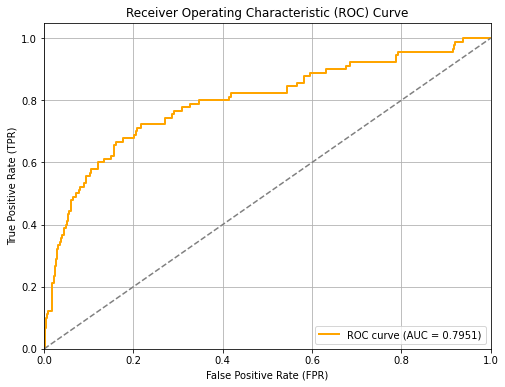

LogisticRegression(C=0.08, solver='liblinear')

In [68]:
evaluate_logistic_regression(0.08, 'liblinear', X_train_smote, y_train_smote, X_test)

Training Accuracy (C=0.06, Solver=liblinear): 0.8449283058948487
Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1883
           1       0.85      0.84      0.84      1883

    accuracy                           0.84      3766
   macro avg       0.85      0.84      0.84      3766
weighted avg       0.85      0.84      0.84      3766

-------------------------Test Accuracy-----------------------------------
0.8242857142857143
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       610
           1       0.39      0.67      0.49        90

    accuracy                           0.82       700
   macro avg       0.67      0.76      0.69       700
weighted avg       0.87      0.82      0.84       700

-------------------------Confusion_Matrix-------------------------

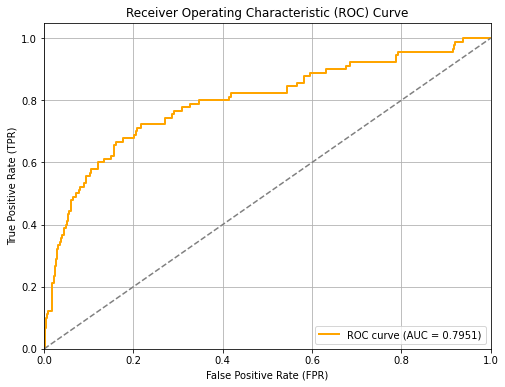

LogisticRegression(C=0.06, solver='liblinear')

In [69]:
evaluate_logistic_regression(0.06, 'liblinear', X_train_smote, y_train_smote, X_test)

Training Accuracy (C=0.05, Solver=liblinear): 0.8374933616569304
Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1883
           1       0.84      0.83      0.84      1883

    accuracy                           0.84      3766
   macro avg       0.84      0.84      0.84      3766
weighted avg       0.84      0.84      0.84      3766

-------------------------Test Accuracy-----------------------------------
0.8171428571428572
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       610
           1       0.38      0.67      0.48        90

    accuracy                           0.82       700
   macro avg       0.66      0.75      0.69       700
weighted avg       0.87      0.82      0.84       700

-------------------------Confusion_Matrix-------------------------

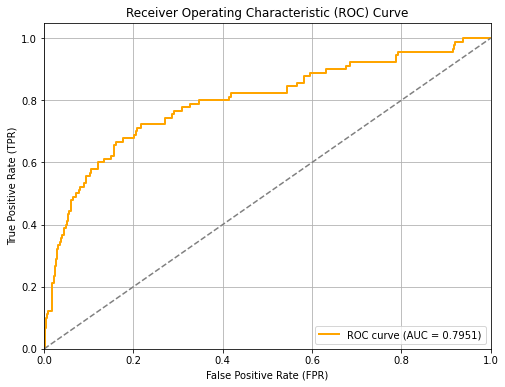

LogisticRegression(C=0.05, solver='liblinear')

In [70]:
evaluate_logistic_regression(0.05, 'liblinear', X_train_smote, y_train_smote, X_test)

* At the value of C= 0.06 and below, we see that the area under the curve remains the same. this imply that reducing beyond this point does not improve our model anymore. We take this as our model and tune it further for the solvers.
* However the valuation metrics varied across the various values of C, thus we opt to proceed with the one that yielded optimal value a C value of 0.06. we proceed to tuning the weights and the solvers for this value of C.
##### 5.3.1.2 Adjusting the weights
We use the selected model with the optimized hyperparameters and proceed to adjust for the weights.

Training Accuracy: 0.8335103558151885
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1883
           1       0.80      0.88      0.84      1883

    accuracy                           0.83      3766
   macro avg       0.84      0.83      0.83      3766
weighted avg       0.84      0.83      0.83      3766

-------------------------Test Accuracy-----------------------------------
0.7657142857142857
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       610
           1       0.32      0.70      0.43        90

    accuracy                           0.77       700
   macro avg       0.63      0.74      0.64       700
weighted avg       0.86      0.77      0.80       700

-------------------------Confusion_Matrix-----------------------------------
[[473 137]
 [ 27

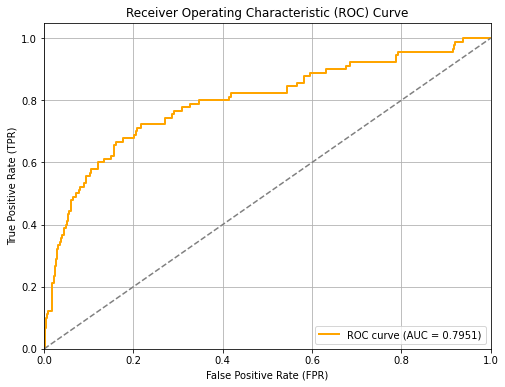

In [71]:
# initialize a logistic regression model
class_weights = {0: 1, 1: 1.5}
baseline_model2= LogisticRegression(C= 0.06 , penalty= 'l2', solver= 'liblinear', class_weight = class_weights)
# fitting the model
baseline_model2.fit(X_train_smote, y_train_smote)
#predictions on the test set
y_train_pred = baseline_model2.predict(X_train_smote)

#baseline model evaluation on the training set
train_accuracy = accuracy_score(y_train_smote, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
Test_evaluation(X_test,baseline_model2)
AU_C(X_test, baseline_model2)

Training Accuracy: 0.8204992033988316
Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1883
           1       0.77      0.92      0.84      1883

    accuracy                           0.82      3766
   macro avg       0.83      0.82      0.82      3766
weighted avg       0.83      0.82      0.82      3766

-------------------------Test Accuracy-----------------------------------
0.7257142857142858
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       610
           1       0.28      0.74      0.41        90

    accuracy                           0.73       700
   macro avg       0.62      0.73      0.62       700
weighted avg       0.86      0.73      0.77       700

-------------------------Confusion_Matrix-----------------------------------
[[441 169]
 [ 23

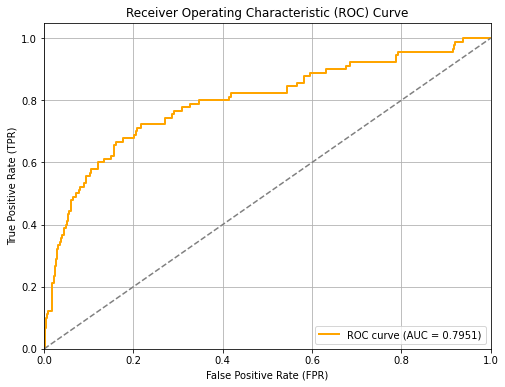

In [72]:
# initialize a logistic regression model
class_weights = {0: 1, 1: 2}
baseline_model2= LogisticRegression(C= 0.06 , penalty= 'l2', solver= 'liblinear', class_weight = class_weights)
# fitting the model
baseline_model2.fit(X_train_smote, y_train_smote)
#predictions on the test set
y_train_pred = baseline_model2.predict(X_train_smote)

#baseline model evaluation on the training set
train_accuracy = accuracy_score(y_train_smote, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
Test_evaluation(X_test,baseline_model2)
AU_C(X_test, baseline_model2)

* We see that for higher weighting of the minority class 1, the customers who churn, we get overally lower accuracy of the model on the testing set but the area under the curve remain  constant. We thus try to strike a balance in the wighting of the minority class to a point wherewe have considerably higher accuracy and better metrics for the minority class.

* By manually adjusting the class weights, the solver and C to the most optimal values;
* C = 0.06
* penalty = 'l2'
* solver = saga 
* class weight = {0: 1, 1: 2}
* We come to a better model, a better off Recall at the expense of precision and f1 score.
* ##### 5.3.2 The Final Logistic Regression Model

-------------------------Test Accuracy-----------------------------------
0.7257142857142858
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       610
           1       0.28      0.74      0.41        90

    accuracy                           0.73       700
   macro avg       0.62      0.73      0.62       700
weighted avg       0.86      0.73      0.77       700

-------------------------Confusion_Matrix-----------------------------------
[[441 169]
 [ 23  67]]


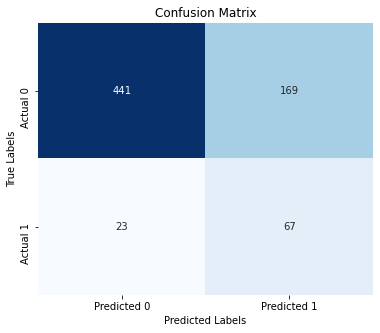

-------------------------Area_underCurve-----------------------------------
0.7950819672131149


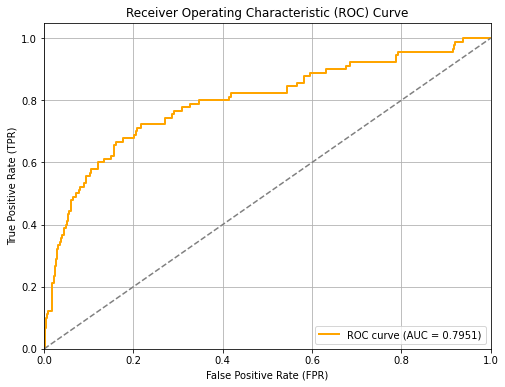

In [74]:
Final_model = LogisticRegression(C= 0.06 , penalty= 'l2', solver= 'liblinear', class_weight = {0: 1, 1: 2})
# fitting the final model
Final_model.fit(X_train_smote, y_train_smote)
#predictions on the test set
y_test_pred = Final_model.predict(X_test)

#baseline model evaluation on the training set

test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
# Show the metrics/performance of the model
Test_evaluation(X_test,baseline_model2)
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Show the area under the curve
AU_C(X_test, baseline_model2)

#### 5.3.2.1 The Feature Importance

In [109]:
# Creating a function that we pass in an array of feature importance from a model
def feature_importance(model_coef):
    # getting the coefficients of the Final Model
    coefficients = model_coef
    coefficients

    # Creating a DataFrame for easier plotting
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': coefficients
    })

    # Sort by absolute value of the coefficients
    feature_importance['Importance'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    # lets plot for the top 15 important features
    top_features = feature_importance[:15]
    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for Churn prediction')
    # Invert the y-axis to display the most important features at the top
    plt.gca().invert_yaxis() 
    plt.show()

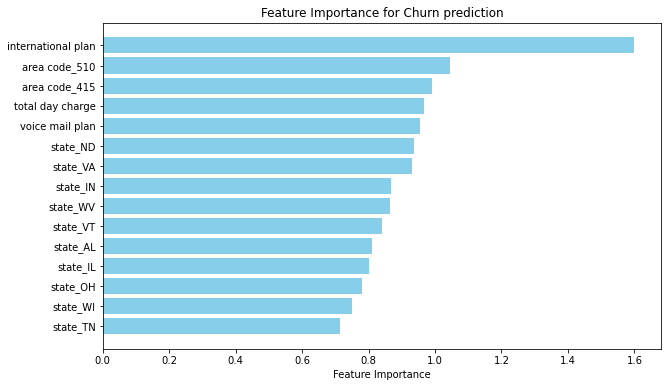

In [110]:
# Call the function and passing in the array of coefficients
feature_importance(Final_model.coef_.flatten())

####  5.3.2.2  Final Logistic Model evaluation
The test accuracy of 0.7257(73%) represents the overall percentage of correct predictions of the customers who are likely to churn. However, this accuracy score does not cover all the instances for when specific classs are to be predicted.
The classification report  gives more details on the model performance, for each class and focusing on the key performance metrics.
* The majority Class (0)
  * Precision of 0.95 - tells that of all the instances the model predicted class 0, it was actually correct 95% of the time.
  * Recall of 0.72 - indicates that the model correctly identified calss 0, 72% of the time. It is a moderate value and indicates that the model missed this class 28% of the time.
  * F1 score of 0.82 implies that the model is both accurate at predicting the calss 0 and good at finding most of these class as true.
* The minority class (1)
  * precision of 0.28 imply that the model predicts this class only 28% correctly. The model is definately not good at predicting this class.
  * Recall of 0.74 tells us that the model correctly identifies class 1, 74% of the time. This is a relatively good score, the model can detect most of the true class 1 customers.
  * F1 score of 0.41 is a relatively lower score indicating the poor balance between the recall and precision of class 1.
  
* The AUC of 0.7951 is relatively a good metric, telling us that the model is better than random guessing. It has a relatively higher capacity to differentiate between the classes.
* From the feature importance visual, the most important features at predicting the customers who are likely to churn are; International plan, area code 450 and 415, total day charge, voice mail plan and state ND and VA.

### 6. The Decision Tree Classifier
With the low performance metrics of the logistic regression model, We try the decision tree classifier. The decision tree algorithm splits the data into smaller subsets that are more simplified to contain atleast one of the category. In this section we model a decision tree and obtain the performance metrics that will be compared to the logistic model above.

In [111]:
# Import necessary libraries to model the decision tree classifier.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

####  6.1 The Baseline DecisionTree Classifier Model

In [112]:
Decision_classifier = DecisionTreeClassifier(random_state = 42, criterion='entropy')
#Fitting/training the model
Decision_classifier.fit(X_train,y_train)
#Lets make predictions on the test data
y_predicted = Decision_classifier.predict(X_train)
# check the accuracy of the model on the training set
accuracy = accuracy_score(y_train,y_predicted)
accuracy
print(f"Training Accuracy: {accuracy}")
print("Training Classification Report:")
print(classification_report(y_train, y_predicted))

Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1883
           1       1.00      1.00      1.00       214

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [58]:
# A function that returns the area under the curve  for the decision tree classifier
def AUC_classifier(data, model):
    # create the probability scores of each of the datapoints:
    y_score = baseline_model1.fit(X_train, y_train).decision_function(data)

    # Compute the ROC curve (FPR, TPR, thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Compute AUC
    roc_auc = auc(fpr, tpr)
    print("-------------------------Area_underCurve-----------------------------------")
    print(roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    # plot the diagonal line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

####  6.2. Performance of the DecisionTree-Classifier on the test data

-------------------------Test Accuracy-----------------------------------
0.9185714285714286
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       610
           1       0.70      0.64      0.67        90

    accuracy                           0.92       700
   macro avg       0.82      0.80      0.81       700
weighted avg       0.92      0.92      0.92       700

-------------------------Confusion_Matrix-----------------------------------
[[585  25]
 [ 32  58]]
-------------------------Area_underCurve-----------------------------------
0.8171402550091075


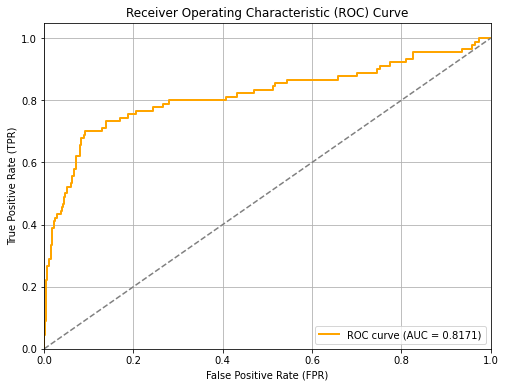

In [113]:
Test_evaluation(X_test, Decision_classifier)
AUC_classifier(X_test, Decision_classifier)

* The training accuracy of 100% indicates potential overfitting, the model perfectly fits on the training data. This is not desired since the model might not generalize well to the training data.
* The test accuracy drops to 91% suggesting and proving that the model overfits to the training data. 
* We thus need to address the overfitting by tuning the hypreparameters; maximum depth, minimum sample splits,and sample leafs

####  6.3. Hyperparameters Tuning
* This important step will allow us to alter the hyperparameters and model an optimum performing decision tree classifier.  The idea is to find the best combination of these parameters that reduces overfitting and improves generalization to the  unseen data.

##### 6.3.1 Optmizing for the number of features/ Depth

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Define the range of max_depth values to check
max_depths = list(range(1, 33))

# Initialize variable to track the best max_depth and corresponding AUC
best_max_depth = None
best_test_auc = 0

# Loop over different max_depth values
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Evaluate the test set AUC
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    test_auc = auc(false_positive_rate, true_positive_rate)
    
    # Track the best max_depth and its corresponding AUC
    if test_auc > best_test_auc:
        best_test_auc = test_auc
        best_max_depth = max_depth

# Output the best max_depth
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Test AUC: {best_test_auc}")


Best Max Depth: 9
Best Test AUC: 0.8210382513661202


##### 6.3.2 Tuning the number sample splits

In [115]:
# Define the range of min_samples_split values to check
min_samples_splits = [2, 10, 20, 30, 50]

# Initialize variable to track the best min_samples_split and corresponding AUC
best_min_samples_split = None
best_test_auc_split = 0

# Loop over different min_samples_split values
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, 
                                min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    
    # Evaluate the test set AUC
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    test_auc = auc(false_positive_rate, true_positive_rate)
    
    # Track the best min_samples_split and its corresponding AUC
    if test_auc > best_test_auc_split:
        best_test_auc_split = test_auc
        best_min_samples_split = min_samples_split

# Output the best min_samples_split
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Test AUC: {best_test_auc_split}")


Best Min Samples Split: 30
Best Test AUC: 0.8243169398907103


##### 6.3.3 Tuning min sample leafs

In [116]:
# Define the range of min_samples_leaf values to check
min_samples_leafs = [1, 2, 5, 10]

# Initialize variable to track the best min_samples_leaf and corresponding AUC
best_min_samples_leaf = None
best_test_auc_leaf = 0

# Loop over different min_samples_leaf values
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, 
                                min_samples_split=best_min_samples_split, 
                                min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    
    # Evaluate the test set AUC
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    test_auc = auc(false_positive_rate, true_positive_rate)
    
    # Track the best min_samples_leaf and its corresponding AUC
    if test_auc > best_test_auc_leaf:
        best_test_auc_leaf = test_auc
        best_min_samples_leaf = min_samples_leaf

# Output the best min_samples_leaf
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")
print(f"Best Test AUC: {best_test_auc_leaf}")


Best Min Samples Leaf: 5
Best Test AUC: 0.8259562841530054


#### 6.4 Final Decision Tree Model (Tuned hyper parameters)
* Using the combination of the hyperparameters that optimize the performance, we model the final DecisionTree Classifier. 

In [121]:
Decision_classifier2 = DecisionTreeClassifier(random_state = 42,
                                              criterion='entropy',
                                             max_depth = 9,
                                             min_samples_split =30,
                                             min_samples_leaf= 5)
#Fitting/training the model
Decision_classifier2.fit(X_train,y_train)
#Lets make predictions on the test data
y_predicted = Decision_classifier2.predict(X_train)
# check the accuracy of the model on the training set
accuracy = accuracy_score(y_train,y_predicted)
accuracy
print(f"Training Accuracy: {accuracy}")
print("Training Classification Report:")
print(classification_report(y_train, y_predicted))

Training Accuracy: 0.9656652360515021
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1883
           1       0.91      0.74      0.81       214

    accuracy                           0.97      2097
   macro avg       0.94      0.86      0.90      2097
weighted avg       0.96      0.97      0.96      2097



-------------------------Test Accuracy-----------------------------------
0.9442857142857143
-------------------------Testing Classification Report-----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       610
           1       0.87      0.67      0.75        90

    accuracy                           0.94       700
   macro avg       0.91      0.83      0.86       700
weighted avg       0.94      0.94      0.94       700

-------------------------Confusion_Matrix-----------------------------------
[[601   9]
 [ 30  60]]
-------------------------Area_underCurve-----------------------------------
0.8171402550091075


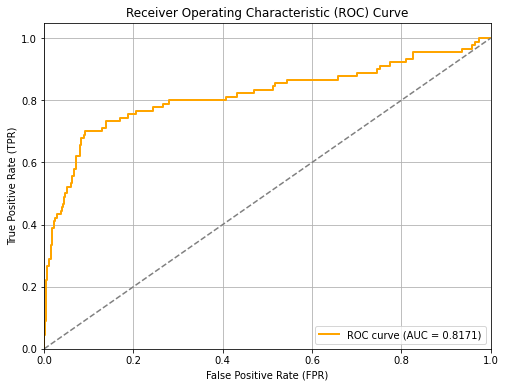

In [122]:
Test_evaluation(X_test, Decision_classifier2)
AUC_classifier(X_test, Decision_classifier2)

#### 6.4.1 Feature Importance of the Decision Tree Classifier

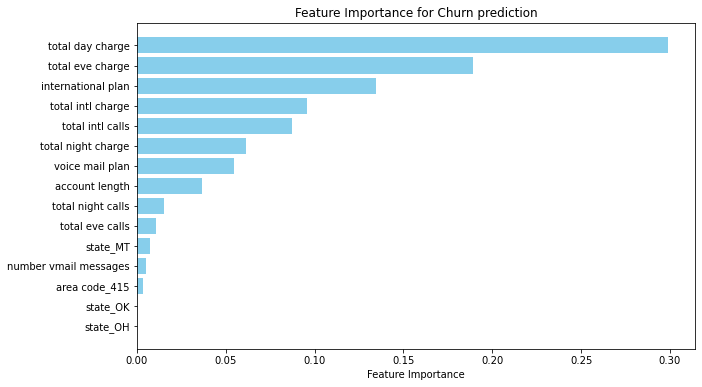

In [106]:
feature_importance(Decision_classifier2.feature_importances_.flatten())

###  6.5 Final DecisionTree Model Evaluation
The tuned model shows reduced overfitting since the training accuracy is lower at 96.5% as compared to the baseline model (100%).
The model Test accuracy also improved from 91% to 94%. The final model correctly predicted 94% of the new data set(the X_test data). This is a commendable result indicating that the model has been trained well, not overfitting and generalizes well to unseen data.
###### The classification report:
* The majority Class (0)
     * Precision = 95%. Of all predicted instances, 95 % were correctly classified as class 0.
     * Recall= 99%. Of all predicted instances for class 0, the model was 99% accurate.
     * F1-score = 0.97. This is the harmonic mean of recall and precision. It indicates that the model performs well in correctly classifying class 0.
* The minority class(1)
    * Precision = 0.87. Of all instances the model predicted class 1, it was correct 87% of the time.
    * Recall = 0.67. The model correctly classified 67% of class 1. This implies that it missed 33% of this class
    * F1-score = 0.75. The harmonic mean of recall and precision for class 1. This is moderate performance in predicting class 1.
    
######  The confusion matrix:
* Class 0:
        * true negatives = 601
        * false positives = 9
* class 1:
        * false negatives = 30
        * true positives = 60

* The AUC of 0.8217 is relatively a good metric, indicating the model's significance over random guessing. It has a relatively higher capacity to differentiate between the classes 1 and 0. 
* In the decision tree classifier, the most important features at predicting the customer churn are; total day charge, total evening charge, international plan, total intl charge and total intl calls.


### 6.6. Conclusions
* We achieved the project objectives
* We developed two classification models, logistic regression and decision tree classifier. We evaluated their performance metrics; precision, recall and f1-score.
* By considering the performance metrics of our developed models, the decision tree classifier is preferred for its better performance. 
#####  6.6.1  Evaluating Decision Tree Classifier against the success metrics
 * Accuracy 94%.  
 * Precision 87%. 
 * Recall 67%
 * F1-score 75%
 
* The selected model outperformed the success metrics, indicating that the model's performance was superior. Therefore, the Decision Tree Classifier emerged as the most effective choice for this task.
* The factors that most influenced Decision tree classifier were; ; total day charge, total evening charge, international plan, total intl charge and total intl calls.
* From the bivariate analysis, we found that an increase in ; total day charge, total evening charge, total intl charge lead to higher rate of churning.
* From the best logistic model, the most important features at predicting the customers who are likely to churn are; International plan, area code 450 and 415, total day charge, voice mail plan and state ND and VA.

### 6.7.  Business Recommendation
* Give promotional offers to customers from the area codes 510 and 415. These areas have a high churn rate. Offering promotions such as discounts can act as incentives that discourage customers from churning
* Improve the pricing strategies in favour of the customers, this would include leveraging and adjusting prices for the day, evening and night calls. Also the company can introduce packages that encourage more calls at lower costs for customers who are likely to churn.
* Focus on customer retention strategies, for customers having the international plan. These customers have a higher likelyhood of churn according to the decision tree classifier and retaining these customers would save the company the cost of acquiring new customers.
* Enhance the quality of customer service and decrease the volume of customer service calls by strengthening training programs for customer service representatives. This will ensure quicker and more efficient resolution of customer issues, ultimately boosting customer satisfaction and reducing churn.

### 7. Next Steps & Future Improvements
1. Model validation and and comparison: 
* Perform cross validation to check the performance of the decision tree classifier, to validate the accuracy of the model.
* Comparing the model with other classification models like the XG boost, random forest and SVM using same metrics.
2. Model improve: include pruning to reduce the complexity of the decision tree classifier
3. Model deployment/ Monitoring
* If the model is rendered fit for production, it should be deployed and performance tracked overtime.
4. Actionable Recommendations
* Implementing the recommendations and monitor the model performance based on the adjustments.